In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

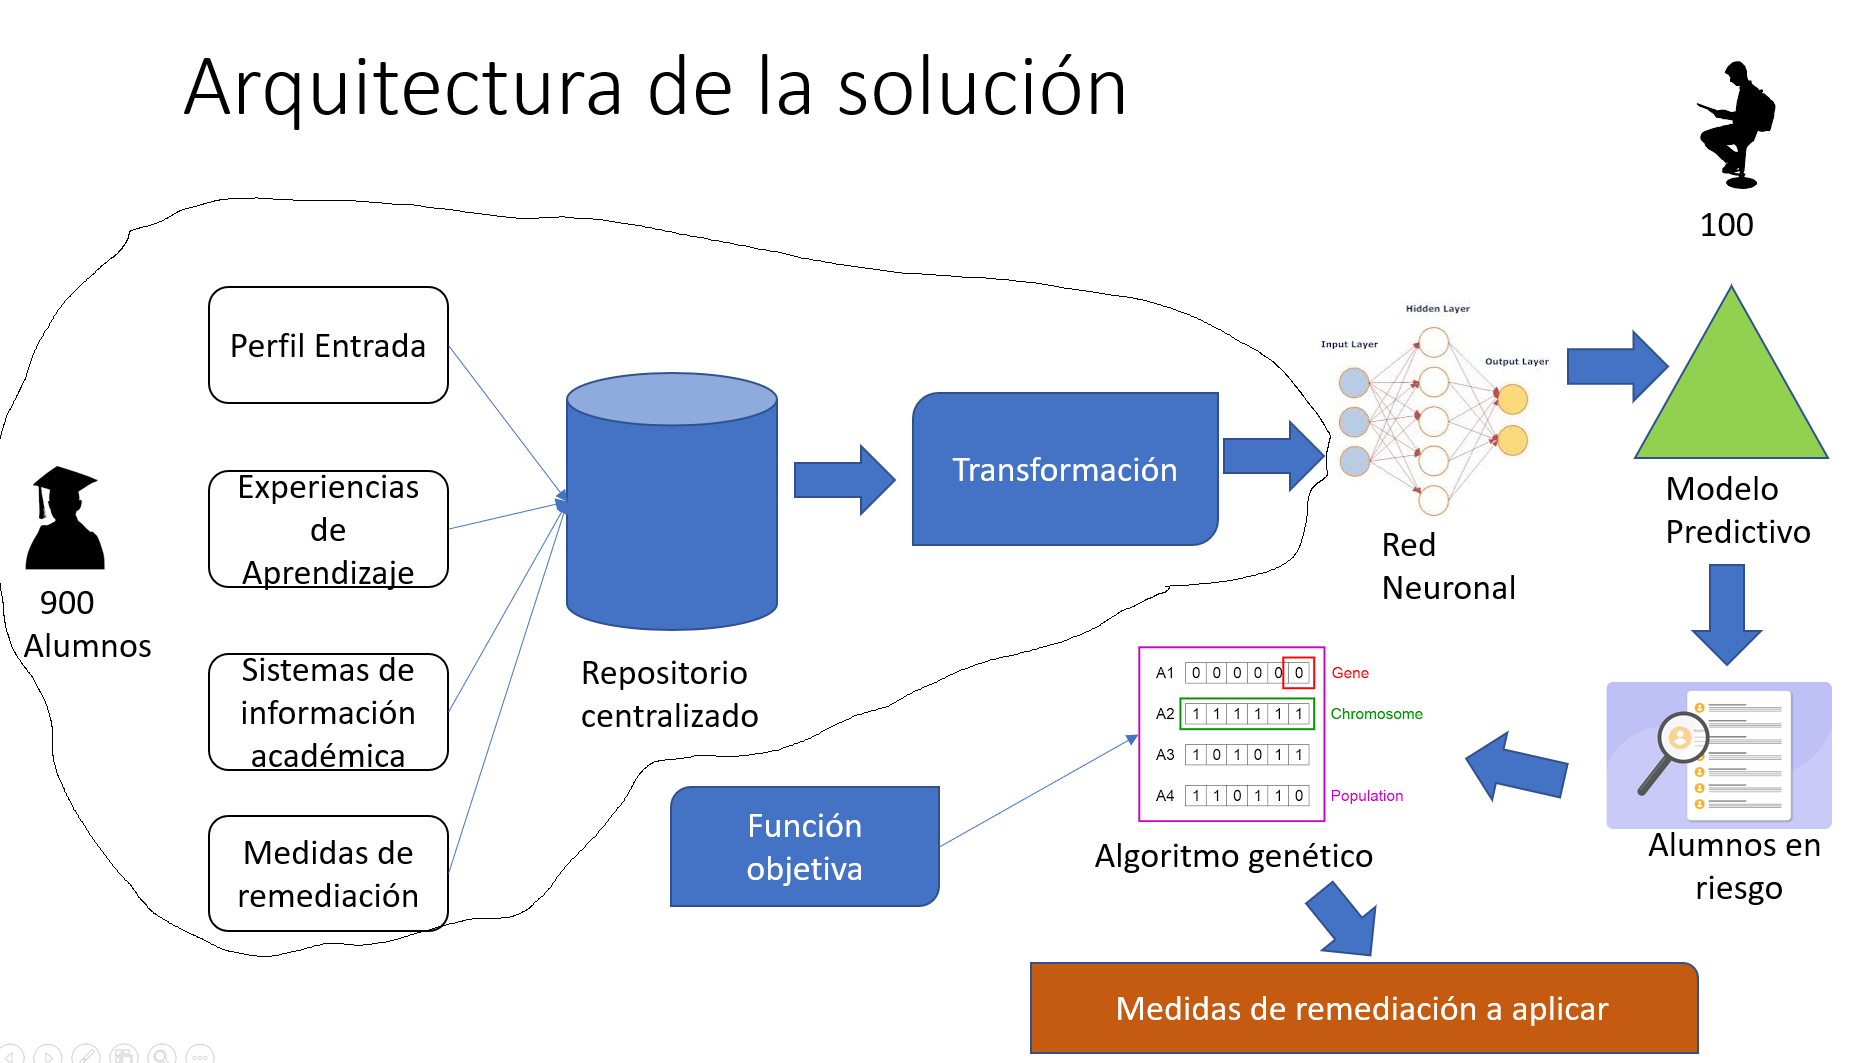

In [2]:
from IPython.display import Image
Image(filename='img/Arquitectura.png') 

In [5]:
def load_perfil():
    perfiles = pd.read_csv("data/perfil_alumnos.csv")
    cambio_carrera = pd.read_csv("data/cambio_carrera.csv")
    distribucion_becas = pd.read_csv("data/distribucion_becas.csv")
    perfiles['cambio_carrera'] = cambio_carrera['x']
    perfiles['distribucion_becas'] = distribucion_becas['x']

    return perfiles

In [6]:
load_perfil()

,id,genero,admision_letras,admision_numeros,promedio_preparatoria,edad_ingreso,evalucion_socioeconomica,nota_conducta,cambio_carrera,distribucion_becas
0,1,2,60.093731,35.187462,70.281193,18,4,16,0,0
1,2,2,59.078737,33.157475,67.236212,17,4,15,0,0
2,3,2,53.143347,21.286695,60.000000,15,4,13,0,0
3,4,1,57.004161,29.008323,61.012484,16,4,14,0,0
4,5,2,61.472726,37.945451,74.418177,18,4,16,0,0
...,...,...,...,...,...,...,...,...,...,...
995,996,1,63.986462,42.972923,81.959385,19,4,17,0,0
996,997,2,62.641241,40.282483,77.923724,19,4,17,0,0
997,998,2,61.418349,37.836697,74.255046,18,4,16,0,0
998,999,2,59.939303,34.878607,69.817910,17,4,15,0,0


In [ ]:
def load_materias():
    for i in range(1, 2):
        path_asistencias = "data/asistencias/asistencias_{}.csv".format(i)
        path_examenes = "data/examenes/resultados_examenes_{}.csv".format(i)
        path_trabajos = "data/trabajos/resultados_trabajos_totales_{}.csv".format(i)

        asistencias = pd.read_csv(path_asistencias)
        resultados_examenes = pd.read_csv(path_examenes)
        resultados_trabajos = pd.read_csv(path_trabajos)

        for m in range(1, 55):
            nombre_materia = "X{}".format(m)
            asistencias_completas = len(asistencias[asistencias[nombre_materia] == 2])
            # Cada 2 retardos cuentan como falta
            retardos = len(asistencias[asistencias[nombre_materia] == 1])
            asistencias_completas = asistencias_completas - int(retardos / 2)
            porcentaje_asistencias = (asistencias_completas / 32) * 100
            print("porcentaje de asistencias para {}: {}".format(nombre_materia, porcentaje_asistencias))
            # Los exámenes representan el 40% de la calificación (la suma de ambos)
            suma_examenes = resultados_examenes[nombre_materia].sum(axis=0)
            print("suma examenes para {}: {}".format(nombre_materia, suma_examenes))
            # Los trabajos representan el 60% de la calificación (el promedio de todos los trabajos)
            porcentaje_trabajos = ((resultados_trabajos[nombre_materia].sum(axis=0) / 4) / 20) * 60
            print("resultado trabajos para {}: {}".format(nombre_materia, porcentaje_trabajos))
            print("resultado final para {}: {}".format(nombre_materia, (suma_examenes + porcentaje_trabajos)))
            print('-' * 500)

In [ ]:
load_materias()